**Schema:**

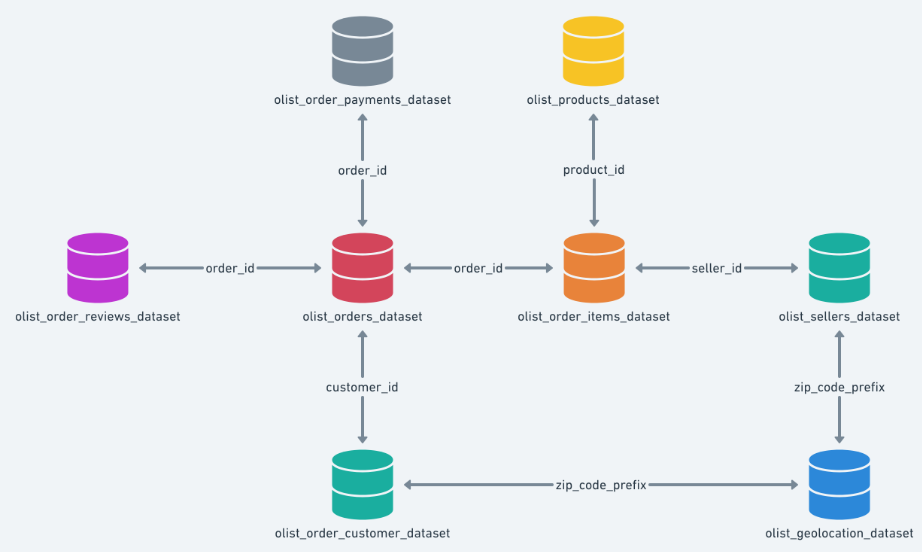

Dados obtidos em: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_order_items_dataset.csv

# Importando libs e carregando dados

In [25]:
# Permitindo acesso do notebook ao Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Dataframe de pedidos
orders = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Análise Olist/Dados/olist_orders_dataset.csv',
                      delimiter = ',',
                      encoding = 'UTF-8')
orders.shape

(99441, 8)

In [41]:
# Dataframe de clientes
clients = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Análise Olist/Dados/olist_customers_dataset.csv',
                       delimiter = ',',
                       encoding = 'UTF-8')
clients.shape

(99441, 5)

# Tratamento dos dados

In [46]:
def generate_metadata(dataframe):
  """
  Gera um dataframe contendo metadados das colunas do dataframe fornecido.

  :param dataframe: Dataframe para o qual os metadados são gerados.
  :return: Dataframe contendo metadados.
  """

  # Coleta de metadados básicos
  metadata = pd.DataFrame({
      'Coluna' : dataframe.columns,
      'Tipo de dados' : dataframe.dtypes,
      'Cardinalidade' : dataframe.nunique(),
      'Valores ausentes' : dataframe.isnull().sum(),
      'Valores ausentes (%)' : round(dataframe.isnull().sum() / len(dataframe) * 100, 2),
      'Amostra de dados' : dataframe.apply(lambda x: str(list(x.sample(3)) if len(x) > 3 else list(x)))
  })

  metadata = metadata.sort_values(by='Tipo de dados')
  metadata = metadata.reset_index(drop=True)

  return metadata

In [47]:
# Metadados no dataframe orders
generate_metadata(orders)

,Coluna,Tipo de dados,Cardinalidade,Valores ausentes,Valores ausentes (%),Amostra de dados
0,order_id,object,99441,0,0.00,"['fc0d78109239dcb41dc110f375f1b397', 'ee05ea68..."
1,customer_id,object,99441,0,0.00,"['62337198799e0a700ead49e10a3d0629', '45e81b9e..."
2,order_status,object,8,0,0.00,"['delivered', 'delivered', 'delivered']"
3,order_purchase_timestamp,object,98875,0,0.00,"['2018-05-11 15:16:39', '2017-10-14 11:30:47',..."
4,order_approved_at,object,90733,160,0.16,"['2018-03-06 10:55:30', '2018-01-26 16:19:50',..."
5,order_delivered_carrier_date,object,81018,1783,1.79,"['2018-06-14 14:01:00', '2017-08-24 13:23:33',..."
6,order_delivered_customer_date,object,95664,2965,2.98,"['2017-08-15 16:16:06', '2018-04-09 19:54:48',..."
7,order_estimated_delivery_date,object,459,0,0.00,"['2017-10-25 00:00:00', '2018-05-02 00:00:00',..."


In [48]:
# Metadados no dataframe clients
generate_metadata(clients)

,Coluna,Tipo de dados,Cardinalidade,Valores ausentes,Valores ausentes (%),Amostra de dados
0,customer_zip_code_prefix,int64,14994,0,0.0,"[55006, 45700, 11060]"
1,customer_id,object,99441,0,0.0,"['338145efe333458c4d699306d6860ace', '571801f0..."
2,customer_unique_id,object,96096,0,0.0,"['2261387de804d0cdace85807669e0131', '8af17078..."
3,customer_city,object,4119,0,0.0,"['campinas', 'andrelandia', 'sao carlos']"
4,customer_state,object,27,0,0.0,"['RS', 'MG', 'SP']"
